## CNN: MNIST Classification

#### Libraries

In [84]:
# Dataframe/numerical libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Tensorflow libraries
import tensorflow as tf
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard

sns.set_theme(color_codes=True)

#### Loading Dataset

In [85]:
# Importing the training and test values
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Checking null values

In [86]:
train.isnull().any().any()

False

In [87]:
test.isnull().any().any()

False

#### Splitting train data

In [88]:
# Splitting train data into features and target
X_train = train.drop('label', axis=1)
y_train = train.label

#### Normalizing

In [89]:
# Scaling the datas
X_train = X_train/255.0
X_test = test/255.0

#### Count the labels

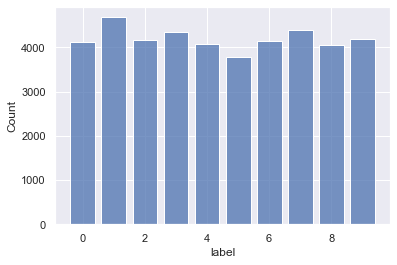

0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

In [90]:
# Counting and plotting the number of each kind of label
sns.histplot(y_train, shrink=0.8, discrete=True)
plt.show();

y_train.value_counts().sort_index()

#### Turning the samples into arrays

In [91]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)

#### Reshaping

In [92]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [93]:
X_train.shape

(42000, 28, 28, 1)

#### Encoding categorical label

In [94]:
y_train = to_categorical(y_train, num_classes=10)

In [95]:
y_train.shape

(42000, 10)

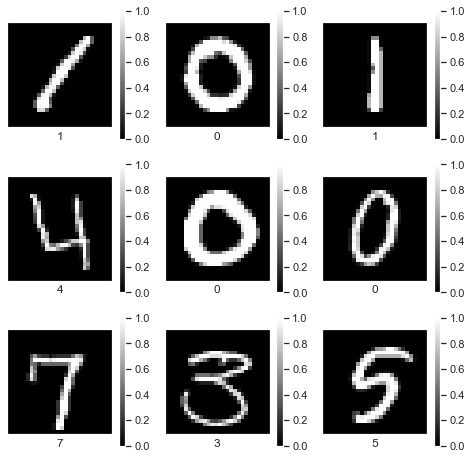

In [96]:
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.xlabel(y_train[i].argmax())
    plt.xticks([])
    plt.yticks([])
    plt.colorbar();
plt.show()

#### Modeling

In [109]:
model = Sequential([Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28,1)),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(0.25),
                    
                    Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
                    MaxPooling2D(pool_size=(2,2)),
                                        
                    Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(0.25),
                    
                    Flatten(),
                    Dense(10, activation='softmax'),
                    ])

In [110]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 7, 7, 32)         

#### Compile the model

In [111]:
model.compile(loss='categorical_crossentropy',
            optimizer=Adam(),
            metrics=['accuracy'])

#### Fitting the model

In [112]:
history = model.fit(X_train, y_train, batch_size=32, epochs=20, shuffle=True, validation_split=0.1, verbose=2)

Epoch 1/20
1182/1182 - 60s - loss: 0.3020 - accuracy: 0.9038 - val_loss: 0.0687 - val_accuracy: 0.9774 - 60s/epoch - 51ms/step
Epoch 2/20
1182/1182 - 56s - loss: 0.0889 - accuracy: 0.9720 - val_loss: 0.0475 - val_accuracy: 0.9840 - 56s/epoch - 47ms/step
Epoch 3/20
1182/1182 - 56s - loss: 0.0636 - accuracy: 0.9803 - val_loss: 0.0402 - val_accuracy: 0.9867 - 56s/epoch - 47ms/step
Epoch 4/20
1182/1182 - 56s - loss: 0.0525 - accuracy: 0.9834 - val_loss: 0.0380 - val_accuracy: 0.9869 - 56s/epoch - 47ms/step
Epoch 5/20
1182/1182 - 57s - loss: 0.0456 - accuracy: 0.9854 - val_loss: 0.0406 - val_accuracy: 0.9860 - 57s/epoch - 49ms/step
Epoch 6/20
1182/1182 - 63s - loss: 0.0423 - accuracy: 0.9866 - val_loss: 0.0304 - val_accuracy: 0.9890 - 63s/epoch - 53ms/step
Epoch 7/20
1182/1182 - 59s - loss: 0.0355 - accuracy: 0.9883 - val_loss: 0.0399 - val_accuracy: 0.9864 - 59s/epoch - 50ms/step
Epoch 8/20
1182/1182 - 59s - loss: 0.0327 - accuracy: 0.9891 - val_loss: 0.0263 - val_accuracy: 0.9907 - 59s/ep

#### Plotting the accuracy

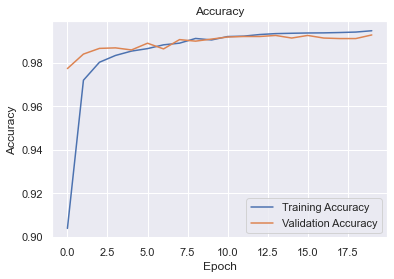

In [113]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

#### Plottting the loss

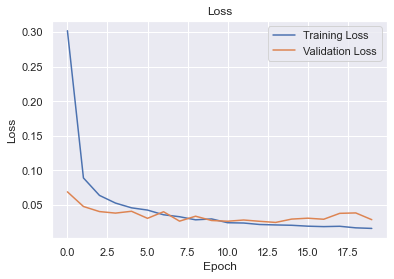

In [114]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show();

#### Predictions

In [115]:
predictions = model.predict(X_test, batch_size=32, verbose=0)

In [116]:
np.round(predictions)

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [117]:
pred = np.argmax(predictions, axis=1)
pred

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

#### Submission

In [118]:
index_list = []
for i in enumerate(pred):
    i = i[0] + 1
    index_list.append(i)

submission = pd.DataFrame({'ImageId':index_list, 'Label':pred})

In [119]:
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [120]:
submission.to_csv('sample_submission.csv', index=False)